In [6]:
import numpy as np
in_dir = 'data/'
txt_name = "irisdata.txt"
iris_data = np.loadtxt(in_dir + txt_name, comments="%")
# x is a matrix with 50 rows and 4 columns
x = iris_data[0:50, 0:4]

In [7]:
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

Number of features: 4 and number of observations: 50


In [8]:
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]

In [25]:
# Use ddof = 1 to make an unbiased estimate
var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_w = pet_w.var(ddof=1)
print(f"Sepal length, width variance: {var_sep_l}, {var_sep_w}. "
          f"Petal length, width variance: {var_pet_l}, {var_pet_w}")

Sepal length, width variance: 0.12424897959183677, 0.1436897959183674. Petal length, width variance: 0.030159183673469384, 0.01110612244897959


In [31]:
sum = 0
for i in range(50):
    sum += sep_l[i]*sep_w[i]
cov_squared = sum/(n_obs - 1)
cov = np.sqrt(cov_squared)

print(f"Covariance between sepal length and width: {cov}")

Covariance between sepal length and width: 4.196427051671458


In [32]:
sum = 0
for i in range(50):
    sum += sep_l[i]*pet_l[i]
cov_squared = sum/(n_obs - 1)
cov = np.sqrt(cov_squared)

print(f"Covariance between sepal length and petal length: {cov}")

Covariance between sepal length and petal length: 2.73577955908702


In [33]:
cov_sep_l_sep_w = np.dot(sep_l, sep_w) / (n_obs - 1)
# cov_sep_l_sep_w = np.cov(sep_l, sep_w)  # gives a different result
print(f"Covariance between sepal length and width: {cov_sep_l_sep_w}")

Covariance between sepal length and width: 17.61


In [35]:
cov_sep_l_pet_l = np.dot(sep_l, pet_l) / (n_obs - 1)
print(f"Covariance between sepal and petal length: {cov_sep_l_pet_l}")

Covariance between sepal and petal length: 7.484489795918367


In [42]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

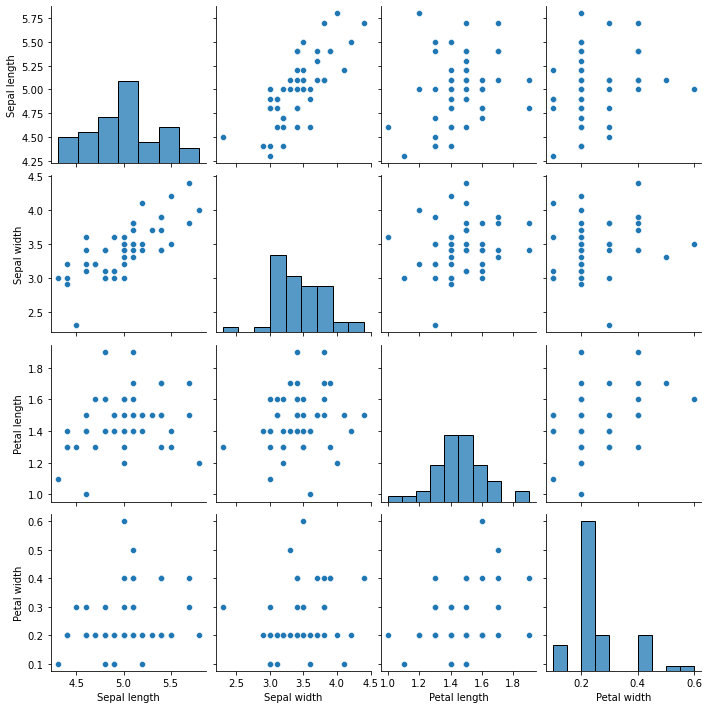

In [43]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])
sns.pairplot(d)
plt.show()

In [45]:
mn = np.mean(x, axis=0)
data = x - mn

In [47]:
print(np.cov(data.T))

[[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]


In [51]:
c_x = np.matmul(data.T,data)/(n_obs - 1)

In [52]:
values, vectors = np.linalg.eig(c_x) # Here c_x is your covariance matrix.

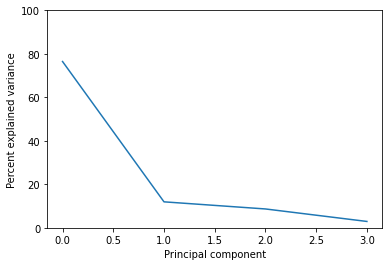

In [54]:
v_norm = values / values.sum() * 100
plt.plot(v_norm)
plt.xlabel('Principal component')
plt.ylabel('Percent explained variance')
plt.ylim([0, 100])

plt.show()

In [55]:
pc_proj = vectors.T.dot(data.T)

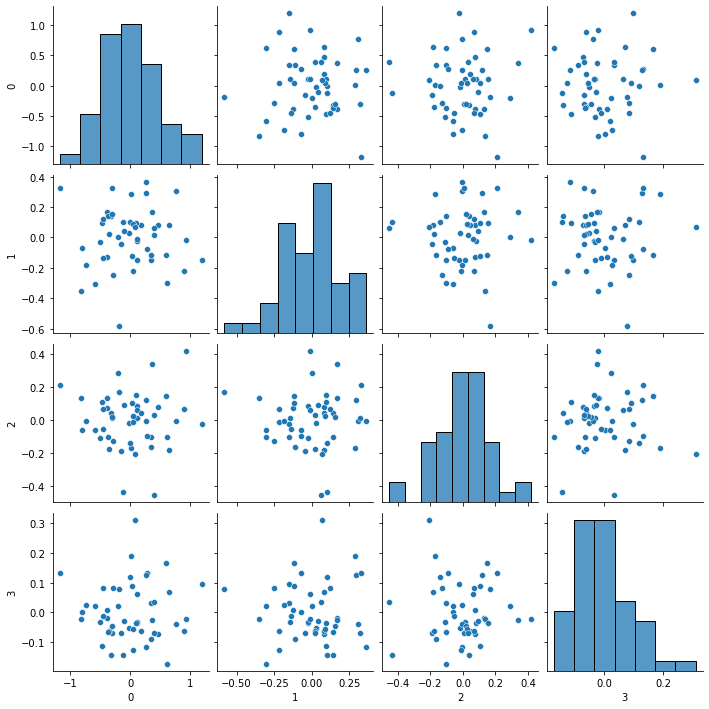

In [60]:
d = pd.DataFrame(pc_proj.T)
sns.pairplot(d)

In [62]:
from sklearn import decomposition

In [65]:
pca = decomposition.PCA()
pca.fit(x)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_

data_transform = pca.transform(data)